In [1]:
from utils import get_data_jax, normalize, denormalize, make_dataset, create_data#, loss_fn
import jax.numpy as jnp
import pickle
import sys
sys.path.append('/home/honam/workspace/ode/pyur5/include/mbse')

import numpy as np
from mbse.utils.replay_buffer import ReplayBuffer, Transition
from models.ens_model import EnsembleModel
import jax
import os


2023-05-31 14:13:00.001732: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fpath = '/home/honam/workspace/ode/pyur5/metadata/metadata_new_1.0_True.pkl'

In [3]:
with open(fpath, 'rb') as f:
    data = pickle.load(f)

In [4]:
data['mu_x']

array([ 0.10469313, -0.00362782,  0.03500685, -0.14592863,  0.70020573,
       -0.01239497, -0.01338437, -0.03366208,  0.05127949])

In [5]:
data['std_x']

array([0.65838669, 0.74535438, 5.63442522, 0.18347499, 0.04053887,
       0.52511822, 0.16705148, 0.78187084, 0.61077865])

In [6]:
task_typ = 'new'
action_max = 1.0
train_horizon = 1
use_cos = True

In [7]:
with open("/home/honam/workspace/ode/pyur5/data_pkl/data_{}_{}_{}_{}.pkl".format(task_typ, action_max, train_horizon, use_cos), "rb") as f:
    data = pickle.load(f)


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [8]:
with open("/home/honam/workspace/ode/pyur5/metadata/metadata_new_1.0_True.pkl", 'rb') as f:
    metadata = pickle.load(f)

In [9]:
metadata['min_x']

array([ -1.        ,  -0.99999997, -17.76619146,  -0.44768751,
         0.61747171,  -1.16621759,  -0.75325099,  -1.        ,
        -1.        ])

In [10]:
data['x'].min(0)

array([ -1.        ,  -0.99999997, -17.76619146,  -0.44768751,
         0.61747171,  -1.16621759,  -0.75325099,  -1.        ,
        -1.        ])

In [11]:
data['transitions']

Transition(obs=array([[ 9.99974844e-01, -7.09301559e-03, -4.25584504e-01, ...,
         6.88000857e-01,  8.89586649e-29,  1.68086688e-29],
       [ 9.99975219e-01, -7.04003014e-03,  3.17920592e-03, ...,
         6.88000857e-01,  5.34109638e-43,  1.00919590e-43],
       [ 9.99975194e-01, -7.04357832e-03, -2.12895830e-04, ...,
         6.88000857e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.95377578e-01,  9.60389321e-02,  2.18569763e-01, ...,
         6.64529032e-01,  3.94765671e-01, -2.76770773e-01],
       [ 9.94975075e-01,  1.00122923e-01,  2.46226818e-01, ...,
         6.64738468e-01,  3.78032820e-01, -2.40484217e-01],
       [ 9.94573516e-01,  1.04036156e-01,  2.36027065e-01, ...,
         6.65780758e-01,  3.91974131e-01, -1.46220372e-01]]), action=array([[-0. , -0. ],
       [-0. , -0. ],
       [-0. , -0. ],
       ...,
       [ 0.6,  0.3],
       [ 0.2,  0.3],
       [-0.1,  0.4]]), next_obs=array([[ 9.99975219e-01, -7.04003014e-03,  3.17920592e-03, ...,
       

In [12]:
data['transitions'].obs.shape

(38363, 7)

In [13]:
train_horizon = 1
n_model = 10
n_horizon = 500
solver = 'ilqr'
use_cos = True
action_max = 1.0
task_typ = 'new'
n_action = 2
model = EnsembleModel(n_action=n_action, use_cos=use_cos, action_max=action_max, task_typ=task_typ)


use_cos:  True
obs_min [ -1.          -0.99999997 -17.76619146  -0.44768751   0.61747171
  -1.16621759  -0.75325099]
obs_max [ 1.          0.99999996 17.58285664  0.18023466  0.7705228   1.09405463
  0.64005807]
action_min [[-1. -1.]]
action_max [[1. 1.]]


/home/honam/anaconda3/envs/ode/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [16]:
model.action_min.T.shape

(2, 1)

In [27]:
import matplotlib.pyplot as plt

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 array([-4.04843079e+02, -3.64360260e+02, -3.23877411e+02, -2.83394592e+02,
        -2.42911758e+02, -2.02428925e+02, -1.61946091e+02, -1.21463257e+02,
        -8.09804230e+01, -4.04975929e+01, -1.47628561e-02]),
 <a list of 38363 BarContainer objects>)

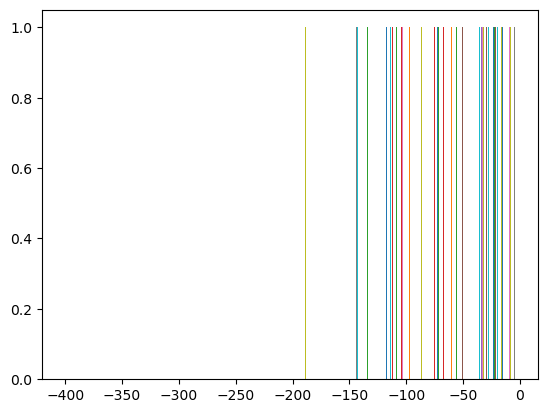

In [28]:
plt.hist(data['transitions'].reward)